In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from statsmodels.tsa.api import VAR

/home/tim/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [3]:
from statsmodels.tsa.stattools import adfuller

In [4]:
df = pd.read_csv('../Data/M2SLMoneyStock.csv',index_col=0,parse_dates=True)

In [5]:
sp = pd.read_csv('../Data/PCEPersonalSpending.csv',index_col=0,parse_dates=True)

In [6]:
df.index.freq = 'MS'

In [7]:
sp.index.freq = 'MS'

In [8]:
df.head()

,Money
Date,
1995-01-01,3492.4
1995-02-01,3489.9
1995-03-01,3491.1
1995-04-01,3499.2
1995-05-01,3524.2


In [9]:
sp.head()

,Spending
Date,
1995-01-01,4851.2
1995-02-01,4850.8
1995-03-01,4885.4
1995-04-01,4890.2
1995-05-01,4933.1


In [10]:
df = df.join(sp)

In [11]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [12]:
df.dropna(inplace=True)

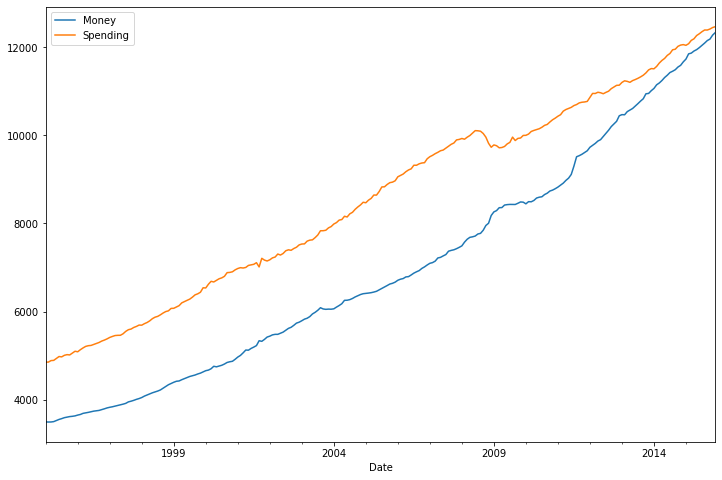

In [13]:
df.plot(figsize=(12,8))

In [16]:
adfuller(df['Spending'],autolag='AIC')

(0.14979608598625338,
 0.9693009944428311,
 3,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2339.735574840993)

In [18]:
df_transformed = df.diff()

In [19]:
df.head()

,Money,Spending
Date,,
1995-01-01,3492.4,4851.2
1995-02-01,3489.9,4850.8
1995-03-01,3491.1,4885.4
1995-04-01,3499.2,4890.2
1995-05-01,3524.2,4933.1


In [25]:
adfuller(df_transformed['Money'].dropna(),autolag='AIC')

(-2.0574040497379404,
 0.261983797851124,
 15,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2222.9483460694405)

In [23]:
adfuller(df_transformed['Spending'].dropna(),autolag='AIC')

(-7.226973930850652,
 2.0410272592129196e-10,
 2,
 248,
 {'1%': -3.4569962781990573,
  '5%': -2.8732659015936024,
  '10%': -2.573018897632674},
 2328.23145843905)

In [26]:
df_transformed1 = df_transformed.diff().dropna()

In [27]:
adfuller(df_transformed1['Money'])

(-7.077470794343014,
 4.760674931296131e-10,
 14,
 235,
 {'1%': -3.4584868856997004,
  '5%': -2.873918902362675,
  '10%': -2.573367247623359},
 2217.097202826827)

In [28]:
adfuller(df_transformed1['Spending'])

(-8.760145426337722,
 2.6878999679871058e-14,
 8,
 241,
 {'1%': -3.4577787098622674,
  '5%': -2.873608704758507,
  '10%': -2.573201765981991},
 2339.3283710766104)

In [29]:
nobs = 12
train = df_transformed1[:-nobs]
test = df_transformed1[-nobs:]

In [30]:
model = VAR(train)

for p in[1,2,3,4,5,6,7]:
    results = model.fit(p)
    print(f'Order {p}')
    print(f'AIC: {results.aic}')
    print('\n')

Order 1
AIC: 14.178610495220896


Order 2
AIC: 13.955189367163705


Order 3
AIC: 13.849518291541038


Order 4
AIC: 13.827950574458281


Order 5
AIC: 13.78730034460964


Order 6
AIC: 13.799076756885807


Order 7
AIC: 13.797638727913972




In [31]:
results = model.fit(5)

In [32]:
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 11, Feb, 2020
Time:                     21:08:27
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    14.1131
Nobs:                     233.000    HQIC:                   13.9187
Log likelihood:          -2245.45    FPE:                    972321.
AIC:                      13.7873    Det(Omega_mle):         886628.
--------------------------------------------------------------------
Results for equation Money
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.516683         1.782238            0.290           0.772
L1.Money           -0.646232         0.068177           -9.479           0.000
L1.Spending        -0.107411         0.051388           -2.090      

In [34]:
lagged_values = train.values[-5:]

In [35]:
z = results.forecast(y=lagged_values,steps=12)

In [36]:
idx = pd.date_range('2015-01-01',periods=12,freq='MS')

In [38]:
df_forecast = pd.DataFrame(data=z,index=idx, columns=['Money_2d','Spending_2d'])

In [39]:
df_forecast

,Money_2d,Spending_2d
2015-01-01,-16.995276,36.149820
2015-02-01,-3.174038,-11.450298
2015-03-01,-0.377725,-6.684969
2015-04-01,-2.602233,5.479458
2015-05-01,4.228557,-2.443365
2015-06-01,1.559393,0.387639
2015-07-01,-0.998410,3.883680
2015-08-01,0.364510,-2.356101
2015-09-01,-1.210627,-1.224147
2015-10-01,0.225877,0.786927


In [40]:
df_forecast['Money_1d'] = (df['Money'].iloc[-nobs-1]-df['Money'].iloc[-nobs-2]) + df_forecast['Money_2d'].cumsum()
df_forecast['MoneyForecast'] = df['Money'].iloc[-nobs-1] + df_forecast['Money_1d'].cumsum()

In [41]:
df_forecast['Spending_1d'] = (df['Spending'].iloc[-nobs-1]-df['Spending'].iloc[-nobs-2]) + df_forecast['Spending_2d'].cumsum()
df_forecast['SpendingForecast'] = df['Spending'].iloc[-nobs-1] + df_forecast['Spending_1d'].cumsum()

In [42]:
df_forecast.head()

,Money_2d,Spending_2d,Money_1d,MoneyForecast,Spending_1d,SpendingForecast
2015-01-01,-16.995276,36.149820,61.604724,11731.704724,46.749820,12108.749820
2015-02-01,-3.174038,-11.450298,58.430686,11790.135410,35.299522,12144.049342
2015-03-01,-0.377725,-6.684969,58.052961,11848.188371,28.614552,12172.663894
2015-04-01,-2.602233,5.479458,55.450728,11903.639099,34.094010,12206.757904
2015-05-01,4.228557,-2.443365,59.679285,11963.318384,31.650645,12238.408549


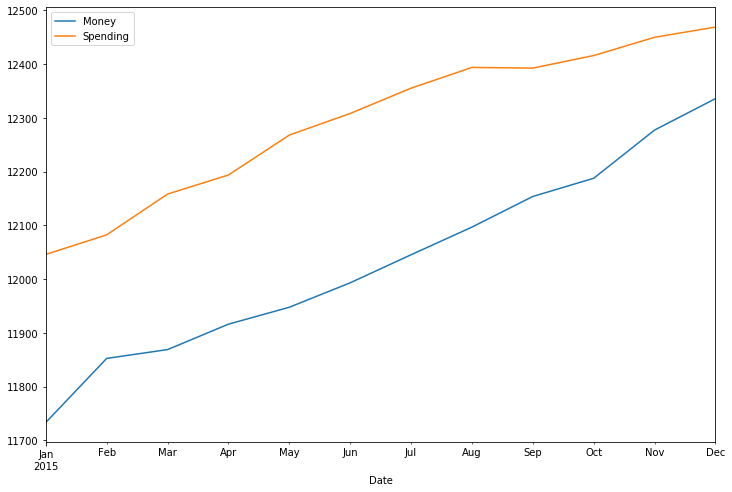

In [43]:
df[-nobs:].plot(figsize=(12,8))


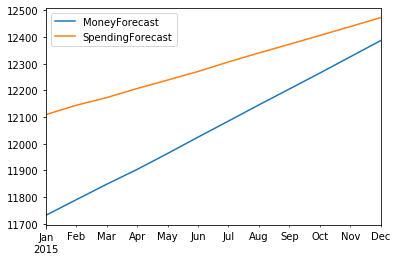

In [44]:
df_forecast[['MoneyForecast','SpendingForecast']].plot()

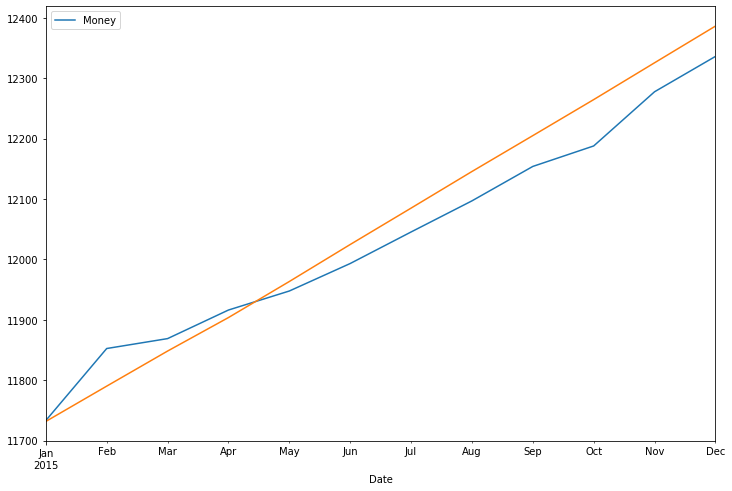

In [45]:
df['Money'][-nobs:].plot(figsize=(12,8),legend=True)
df_forecast['MoneyForecast'].plot()

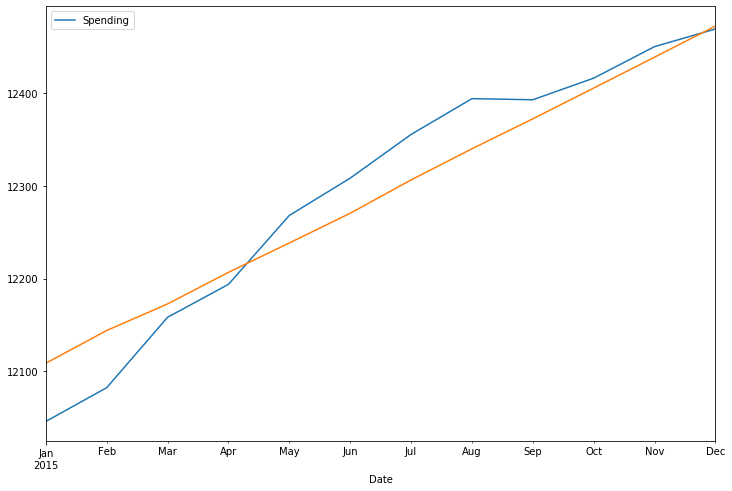

In [46]:
df['Spending'][-nobs:].plot(figsize=(12,8),legend=True)
df_forecast['SpendingForecast'].plot()

In [47]:
df['Money'].mean()

6978.151190476192

In [48]:
from statsmodels.tools.eval_measures import rmse

In [50]:
rmse(df['Money'][-nobs:],df_forecast['MoneyForecast'])

43.71049653558893

In [51]:
rmse(df['Spending'][-nobs:],df_forecast['SpendingForecast'])

37.001175169408086

In [52]:
df['Spending'][-nobs:].mean()

12294.533333333333